# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [50]:
from citipy import citipy
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
from pprint import pprint
import random
import numpy as np
from config import api_key


In [67]:
latitudes = [random.randint(-90,90) for iter in range(50)]
longitudes = [random.randint(-180,180) for iter in range(50)]

## Generate Cities List

In [68]:
#Find the number of possible cities
num_cities = len(latitudes)*len(longitudes)
num_cities

2500

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [69]:
city_list = []


print(f"Beginning Data Retrieval")
print(f"------------------------")

for lat in latitudes:
    for long in longitudes:
        city = citipy.nearest_city(lat,long)
        city_list.append(city.city_name)
        
        

Beginning Data Retrieval
------------------------
City recorded: taolanaro
City recorded: east london
City recorded: mataura
City recorded: punta arenas
City recorded: east london
City recorded: albany
City recorded: hermanus
City recorded: port alfred
City recorded: port alfred
City recorded: kaitangata
City recorded: hermanus
City recorded: rikitea
City recorded: hobart
City recorded: punta arenas
City recorded: hermanus
City recorded: vaini
City recorded: ushuaia
City recorded: port elizabeth
City recorded: port alfred
City recorded: hermanus
City recorded: mataura
City recorded: ushuaia
City recorded: bluff
City recorded: hermanus
City recorded: albany
City recorded: taolanaro
City recorded: ushuaia
City recorded: ushuaia
City recorded: ushuaia
City recorded: busselton
City recorded: ushuaia
City recorded: punta arenas
City recorded: port elizabeth
City recorded: busselton
City recorded: ushuaia
City recorded: taolanaro
City recorded: ushuaia
City recorded: punta arenas
City record

City recorded: upernavik
City recorded: nizhneyansk
City recorded: qaanaaq
City recorded: qaanaaq
City recorded: qaanaaq
City recorded: mys shmidta
City recorded: dikson
City recorded: dikson
City recorded: nizhneyansk
City recorded: ilulissat
City recorded: illoqqortoormiut
City recorded: longyearbyen
City recorded: sukhoy log
City recorded: bisert
City recorded: palmer
City recorded: fort saint john
City recorded: achit
City recorded: novaya igirma
City recorded: portlethen
City recorded: orshanka
City recorded: yelovo
City recorded: beringovskiy
City recorded: fort william
City recorded: haines junction
City recorded: ayan
City recorded: meadow lake
City recorded: boddam
City recorded: bethel
City recorded: nanortalik
City recorded: vasilyevskiy mokh
City recorded: kovernino
City recorded: gistrup
City recorded: bethel
City recorded: attawapiskat
City recorded: ust-kamchatsk
City recorded: letterkenny
City recorded: novobiryusinskiy
City recorded: troitskiy
City recorded: iqaluit
Ci

City recorded: saleaula
City recorded: araioses
City recorded: mto wa mbu
City recorded: bur gabo
City recorded: tsogni
City recorded: samusu
City recorded: machala
City recorded: buala
City recorded: georgetown
City recorded: padang
City recorded: victoria
City recorded: sao paulo de olivenca
City recorded: touros
City recorded: san cristobal
City recorded: hambantota
City recorded: natal
City recorded: puerto ayora
City recorded: ngorongoro
City recorded: hithadhoo
City recorded: sucua
City recorded: hithadhoo
City recorded: sucua
City recorded: atuona
City recorded: paragominas
City recorded: aitape
City recorded: iquitos
City recorded: san cristobal
City recorded: machala
City recorded: vaitupu
City recorded: hambantota
City recorded: meulaboh
City recorded: aitape
City recorded: araioses
City recorded: touros
City recorded: kampene
City recorded: sarakhs
City recorded: neyshabur
City recorded: kahului
City recorded: avenal
City recorded: sabzevar
City recorded: lanzhou
City record

City recorded: nizhneyansk
City recorded: qaanaaq
City recorded: qaanaaq
City recorded: qaanaaq
City recorded: mys shmidta
City recorded: dikson
City recorded: dikson
City recorded: nizhneyansk
City recorded: ilulissat
City recorded: tasiilaq
City recorded: mehamn
City recorded: pelym
City recorded: polunochnoye
City recorded: palmer
City recorded: fort nelson
City recorded: nyrob
City recorded: vanavara
City recorded: brae
City recorded: urdoma
City recorded: voyvozh
City recorded: beringovskiy
City recorded: klaksvik
City recorded: haines junction
City recorded: solnechnyy
City recorded: yellowknife
City recorded: brae
City recorded: lavrentiya
City recorded: nanortalik
City recorded: pudozh
City recorded: mirnyy
City recorded: folldal
City recorded: bethel
City recorded: attawapiskat
City recorded: evensk
City recorded: sorvag
City recorded: baykit
City recorded: zelenoborsk
City recorded: iqaluit
City recorded: tasiilaq
City recorded: attawapiskat
City recorded: belyy yar
City reco

City recorded: bethel
City recorded: moose factory
City recorded: petropavlovsk-kamchatskiy
City recorded: skibbereen
City recorded: kungurtug
City recorded: kushmurun
City recorded: hauterive
City recorded: lagoa
City recorded: geraldton
City recorded: charyshskoye
City recorded: lagoa
City recorded: neepawa
City recorded: verkhnya syrovatka
City recorded: maykain
City recorded: matagami
City recorded: atbasar
City recorded: matagami
City recorded: powell river
City recorded: bonavista
City recorded: aleksandrovsk-sakhalinskiy
City recorded: chapais
City recorded: geraldton
City recorded: moose factory
City recorded: provideniya
City recorded: onguday
City recorded: ulagan
City recorded: aleksandrovsk-sakhalinskiy
City recorded: nanortalik
City recorded: lagoa
City recorded: rokytne


In [71]:
city_list = set(city_list)
len(city_list)

612

In [94]:
cities = city_list
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={api_key}&units={units}&q="

# set up lists to hold reponse info
City = []
Lat = []
Lng = []
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Country = []
Date = []
i = 0

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    i =+ 1
    try:
        City.append(response["name"])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        Max_Temp.append(response['main']['temp_max'])
        Humidity.append(response["main"]["humidity"])
        Cloudiness.append(response["clouds"]["all"])
        Wind_Speed.append(response["wind"]["speed"])
        Country.append(response["sys"]["country"])
        Date.append(response["dt"])
        print(f"Processing {i} iteration for {City}")
    except KeyError:
        pass

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [137]:
cities_dict = {
    "City": City,
    "Lat": Lat,
    "Lng": Lng,
    "Max Temp": Max_Temp,
    "Humidity": Humidity,
    "Cloudiness": Cloudiness,
    "Wind Speed": Wind_Speed,
    "Country": Country,
    "Date": Date
}

cities_data = pd.DataFrame(cities_dict)
cities_data.to_csv("../output_data/cities_data.csv")
cities_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Alice Springs,-23.70,133.88,23.89,15,37,3.60,AU,1601249813
1,Husavik,66.04,-17.34,6.00,100,75,2.60,IS,1601249813
2,Hambantota,6.12,81.12,26.38,80,57,6.28,LK,1601249814
3,Sontra,51.07,9.93,9.44,95,88,0.26,DE,1601249814
4,Neepawa,50.23,-99.47,13.00,54,75,10.80,CA,1601249814
...,...,...,...,...,...,...,...,...,...
551,Kavaratti,10.57,72.64,27.14,80,68,4.12,IN,1601249469
552,Albany,42.60,-73.97,23.33,77,33,2.13,US,1601249470
553,Kaeo,-35.10,173.78,16.62,52,5,5.67,NZ,1601249470
554,Bāfq,31.61,55.41,21.03,22,17,1.07,IR,1601249471


In [96]:
cities_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,5.560000e+02
mean,23.627698,10.233094,17.018777,73.440647,47.937050,3.360881,1.601250e+09
std,32.698660,82.983929,8.990328,20.262913,37.467266,2.299875,1.310308e+02
min,-54.800000,-179.170000,-10.410000,10.000000,0.000000,0.110000,1.601249e+09
25%,-3.297500,-69.220000,9.630000,66.000000,7.750000,1.720000,1.601250e+09
50%,31.660000,26.780000,18.000000,78.500000,40.500000,2.830000,1.601250e+09
75%,50.977500,67.932500,24.532500,88.000000,85.250000,4.535000,1.601250e+09
max,78.220000,179.320000,36.000000,100.000000,100.000000,17.940000,1.601250e+09


In [97]:
#  Get the indices of cities that have humidity over 100%.
indexes_100 = list(np.where(cities_data["Humidity"] > 100))
indexes_100

[array([], dtype=int64)]

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

We can see that Max Temperature has higher values when we get closer to the Equator (the 0th degree in Latitude)

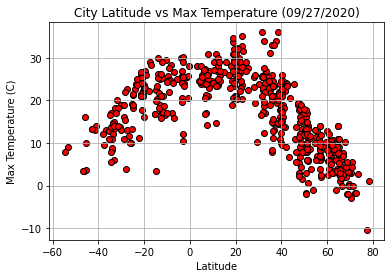

In [138]:
plt.scatter(cities_data["Lat"], cities_data["Max Temp"], facecolors = "red", edgecolors = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs Max Temperature (09/27/2020)")
plt.savefig("../output_data/lat_vs_max_temp.png")

## Latitude vs. Humidity Plot

There seems to be little correlation between humidity and latitude as shown in the plot bellow. One can say that humidity is more correlated to proximity to large bodies of water than latitude itself.

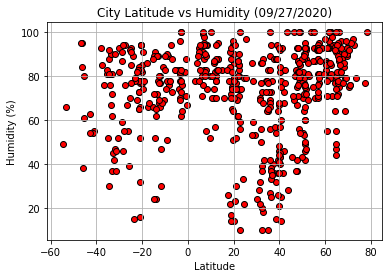

In [139]:
plt.scatter(cities_data["Lat"], cities_data["Humidity"], facecolors = "red", edgecolors = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (09/27/2020)")
plt.savefig("../output_data/lat_vs_humidity.png")

## Latitude vs. Cloudiness Plot

Cloudiness also seems to have no correlation with the city's latitude with the graph being scattered all around.

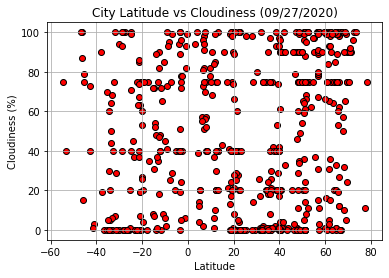

In [140]:
plt.scatter(cities_data["Lat"], cities_data["Cloudiness"], facecolors = "red", edgecolors = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (09/27/2020)")
plt.savefig("../output_data/lat_vs_cloudiness.png")

## Latitude vs. Wind Speed Plot

Wind speed also doesn't seem to vary greatly with Latitude as shown in the graph below.

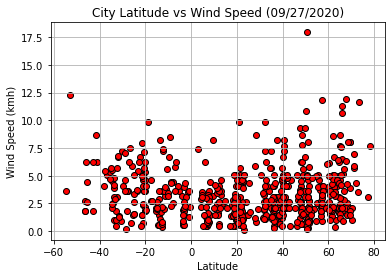

In [141]:
plt.scatter(cities_data["Lat"], cities_data["Wind Speed"], facecolors = "red", edgecolors = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (kmh)")
plt.title("City Latitude vs Wind Speed (09/27/2020)")
plt.savefig("../output_data/lat_vs_wind_speed.png")

## Linear Regression

In [112]:
north_cities = cities_data[cities_data["Lat"]>=0]
south_cities = cities_data[cities_data["Lat"]<0]

There seems to be a great correlation between Max Temperatures and Latitudes as displayed in the plot above. Bellow we can see that from the 0th Latitude, a linear trend is displayed and fits well within our data. With R values above 0.5, this seems to be a good display of correlation.

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8377445500567853


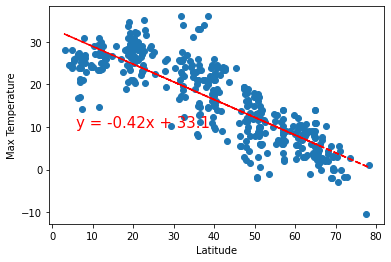

In [125]:
nml_slope, nml_int, nml_r, nml_p, nml_std_err = stats.linregress(north_cities["Lat"], north_cities["Max Temp"])
nml_fit = nml_slope * north_cities["Lat"] + nml_int
plt.scatter(north_cities["Lat"],north_cities["Max Temp"])
plt.plot(north_cities["Lat"],nml_fit,"--",color="r")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
print(f"The r-value is: {nml_r}")
line_eq = "y = " + str(round(nml_slope,2)) + "x + " + str(round(nml_int,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6890187355393054


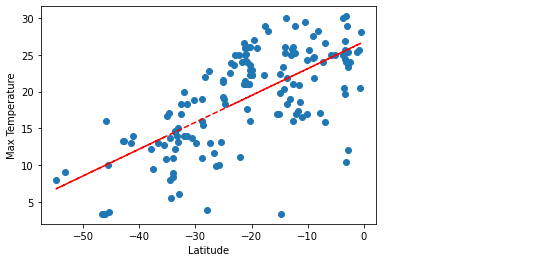

In [126]:
sml_slope, sml_int, sml_r, sml_p, sml_std_err = stats.linregress(south_cities["Lat"], south_cities["Max Temp"])
sml_fit = sml_slope * south_cities["Lat"] + sml_int
plt.scatter(south_cities["Lat"],south_cities["Max Temp"])
plt.plot(south_cities["Lat"],sml_fit,"--",color="r")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
print(f"The r-value is: {sml_r}")
line_eq = "y = " + str(round(sml_slope,2)) + "x + " + str(round(sml_int,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

As shown in the scatter plots below, the correlation between humidity and latitude is very weak with a R value of as little as 0.16.

The r-value is: 0.15013061861865692


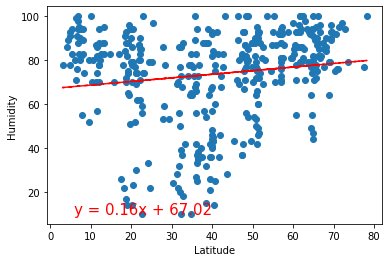

In [127]:
nhl_slope, nhl_int, nhl_r, nhl_p, nhl_std_err = stats.linregress(north_cities["Lat"], north_cities["Humidity"])
nhl_fit = nhl_slope * north_cities["Lat"] + nhl_int
plt.scatter(north_cities["Lat"],north_cities["Humidity"])
plt.plot(north_cities["Lat"],nhl_fit,"--",color="r")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {nhl_r}")
line_eq = "y = " + str(round(nhl_slope,2)) + "x + " + str(round(nhl_int,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.1629861166789869


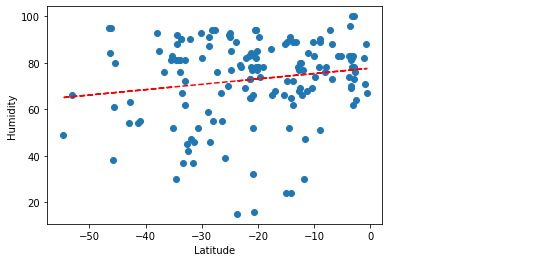

In [128]:
shl_slope, shl_int, shl_r, shl_p, shl_std_err = stats.linregress(south_cities["Lat"], south_cities["Humidity"])
shl_fit = shl_slope * south_cities["Lat"] + shl_int
plt.scatter(south_cities["Lat"],south_cities["Humidity"])
plt.plot(south_cities["Lat"],shl_fit,"--",color="r")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {shl_r}")
line_eq = "y = " + str(round(shl_slope,2)) + "x + " + str(round(shl_int,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

As shown above for humidity, cloudiness doesnt seem to have a well defined correlation with latitude either. The largest R value received was 0.19 on the Northen Hemisphere.

The r-value is: 0.19516043827624147


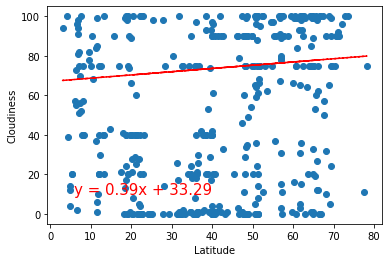

In [130]:
ncl_slope, ncl_int, ncl_r, ncl_p, ncl_std_err = stats.linregress(north_cities["Lat"], north_cities["Cloudiness"])
ncl_fit = ncl_slope * north_cities["Lat"] + ncl_int
plt.scatter(north_cities["Lat"],north_cities["Cloudiness"])
plt.plot(north_cities["Lat"],nhl_fit,"--",color="r")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {ncl_r}")
line_eq = "y = " + str(round(ncl_slope,2)) + "x + " + str(round(ncl_int,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.1333539216275834


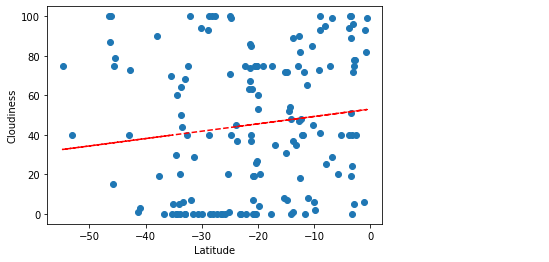

In [131]:
scl_slope, scl_int, scl_r, scl_p, scl_std_err = stats.linregress(south_cities["Lat"], south_cities["Cloudiness"])
scl_fit = scl_slope * south_cities["Lat"] + scl_int
plt.scatter(south_cities["Lat"],south_cities["Cloudiness"])
plt.plot(south_cities["Lat"],scl_fit,"--",color="r")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {scl_r}")
line_eq = "y = " + str(round(scl_slope,2)) + "x + " + str(round(scl_int,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Wind speed as well shows little sign of correlation with latitude. Despite having opposite R values for the northern and southern hemisphere which could be a good sign, the highest R value achieved was 0.23 which doesn't allow us to define a correlation.

The r-value is: 0.23543458829284408


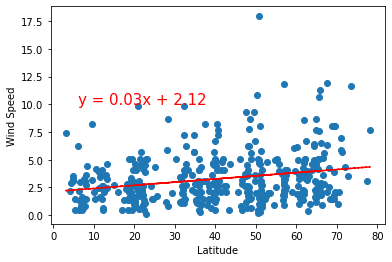

In [132]:
nwl_slope, nwl_int, nwl_r, nwl_p, nwl_std_err = stats.linregress(north_cities["Lat"], north_cities["Wind Speed"])
nwl_fit = nwl_slope * north_cities["Lat"] + nwl_int
plt.scatter(north_cities["Lat"],north_cities["Wind Speed"])
plt.plot(north_cities["Lat"],nwl_fit,"--",color="r")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {nwl_r}")
line_eq = "y = " + str(round(nwl_slope,2)) + "x + " + str(round(nwl_int,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.23016730667199087


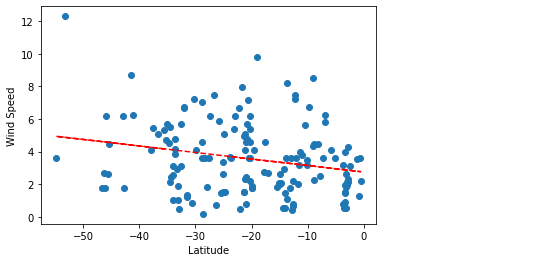

In [134]:
swl_slope, swl_int, swl_r, swl_p, swl_std_err = stats.linregress(south_cities["Lat"], south_cities["Wind Speed"])
swl_fit = swl_slope * south_cities["Lat"] + swl_int
plt.scatter(south_cities["Lat"],south_cities["Wind Speed"])
plt.plot(south_cities["Lat"],swl_fit,"--",color="r")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {swl_r}")
line_eq = "y = " + str(round(swl_slope,2)) + "x + " + str(round(swl_int,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()